In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from svr_regressor import SVRRegressor
from Plotter import Plotter


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [5]:
svr_model = SVRRegressor()
svr_model.set_data(X,y)
Plotter = Plotter()

In [6]:
with open(f'{path}Opt_Model/opt_SVR_model_all_features.pickle', 'rb') as file:
    opt_svr= pickle.load(file)

In [8]:
errores = opt_svr.cv_results_['mean_test_score'][:100]


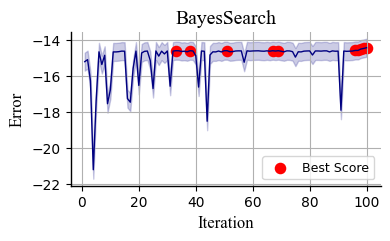

Top 1: Iteration 100, Score -14.437970967596282
Top 2: Iteration 99, Score -14.476463522937058
Top 3: Iteration 98, Score -14.510482791338655
Top 4: Iteration 97, Score -14.589174609099766
Top 5: Iteration 96, Score -14.589452745916082
Top 6: Iteration 33, Score -14.602961105938274
Top 7: Iteration 51, Score -14.603417908484138
Top 8: Iteration 69, Score -14.603699071026242
Top 9: Iteration 67, Score -14.604665522800147
Top 10: Iteration 38, Score -14.604969723775943


In [9]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [10]:
best_params_svr = svr_model.best_hyper(opt_svr,num_max=100)

In [11]:
svr_model.model_params_train= {
            'max_iter': 5000
        }

In [12]:
results, best_model_results , best_model, residual_model = svr_model.trainer_2(params_=best_params_svr[0])

In [23]:
with open(f'{path}Opt_Model_2/BestModel_SVR_all_features.pickle', 'wb') as file:
    pickle.dump(svr_model.model, file)
with open(f'{path}Opt_Model_2/results_SVR_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)
with open(f'{path}Opt_Model_2/residual_model_SVR_model_all_features.pickle', 'wb') as file:
    pickle.dump(residual_model, file)

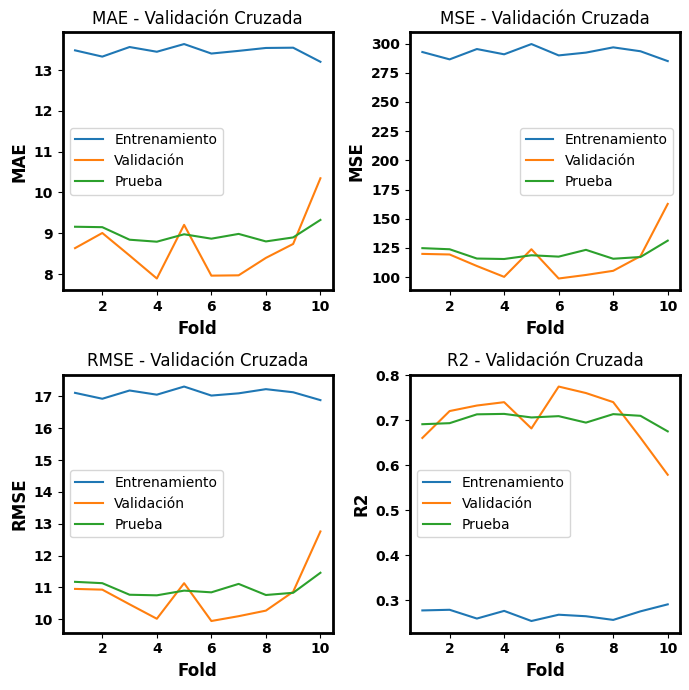

In [13]:
Plotter.plot_metricas_evaluacion(results)

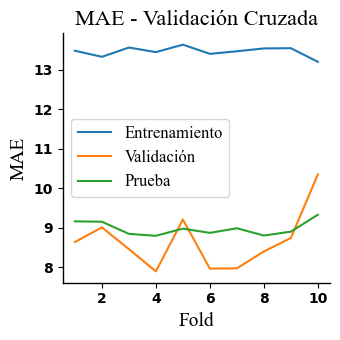

In [14]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [15]:
y_pred=svr_model.predicter_corrected_2(X_test= svr_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     945.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           7.76e-91
Time:                        13:54:59   Log-Likelihood:                -1047.1
No. Observations:                 276   AIC:                             2098.
Df Residuals:                     274   BIC:                             2105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3536      1.660      0.213      0.8

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


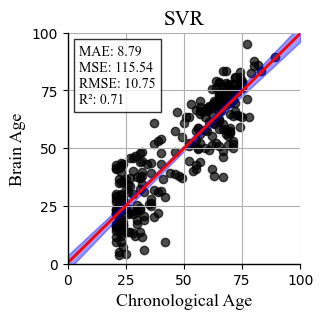

Error medio absoluto: 8.79343283591865
Error cuadrático medio: 115.54270407702175
Raíz del error cuadrático medio: 10.749079219962134
Coeficiente de determinación (R²): 0.7145030365191845


In [16]:
Plotter.plot_regresion(y=y_pred,x= svr_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='SVR',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [17]:
shap_values_, shap_sumary_sorted_ = svr_model.feature_importance_shap(X_test = svr_model.X_test, model = svr_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=100.0, epsilon=1.0, gamma=0.01723069047203692, max_iter=5000)


100%|██████████| 276/276 [07:53<00:00,  1.72s/it]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 1088.1104392084505
IAF_OCC_left: 743.9755223825991
TF_MFG_right: 718.5561424523921
TF_SFG_left: 653.4499960995705
IAF_IFG_right: 584.2848858763467
Low_subj_spec_EPP_PARIET_left: 578.673336841856
TF_INS_right: 471.5470414065803
IAF_INS_right: 398.19503582084906
IAF_ORB_right: 383.95316825453415
TF_INS_left: 383.8320977584658
Low_subj_spec_EPP_CING_left: 341.46954586872175
TF_MFG_left: 311.7463636369164
TF_ORB_left: 302.7759650301424
TF_IFG_right: 300.64415284228016
IAF_ORB_left: 297.3749131108572
Low_subj_spec_RPD_OCC_left: 280.598652704549
IAF_MFG_left: 276.6230899068083
TF_IFG_left: 254.80654565597197
TF_HPC_right: 254.06384920924646
Alpha2_canon_RPD_OCC_left: 217.84910292219274
Alpha2_canon_EPP_OCC_left: 217.56636033169147
TF_HPC_left: 215.65712481533032
TF_SFG_right: 210.72940251225174
IAF_INS_left: 208.05206899563157
Low_subj_spec_RPD_CING_right: 206.804864582572
Low_subj_spec_RPD_PARIET_left: 203.6855404

In [25]:
with open(f'{path}Opt_Model_2/shap_values_svr.pickle', 'wb') as file:
        pickle.dump(shap_values_, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_svr.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted_, file)

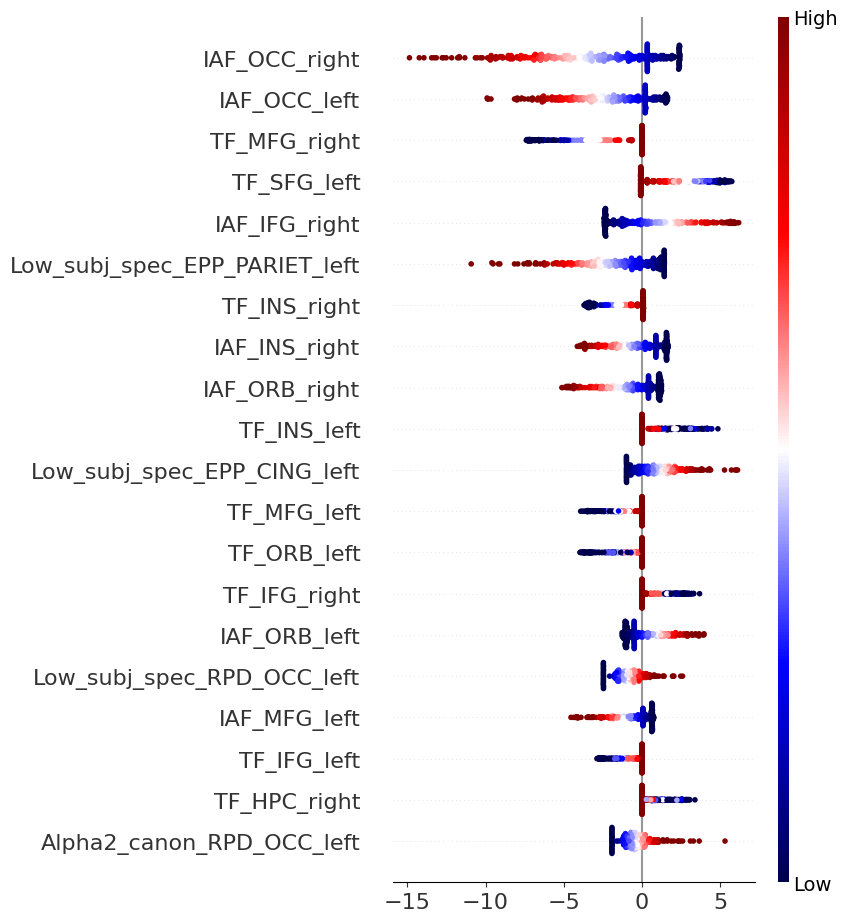

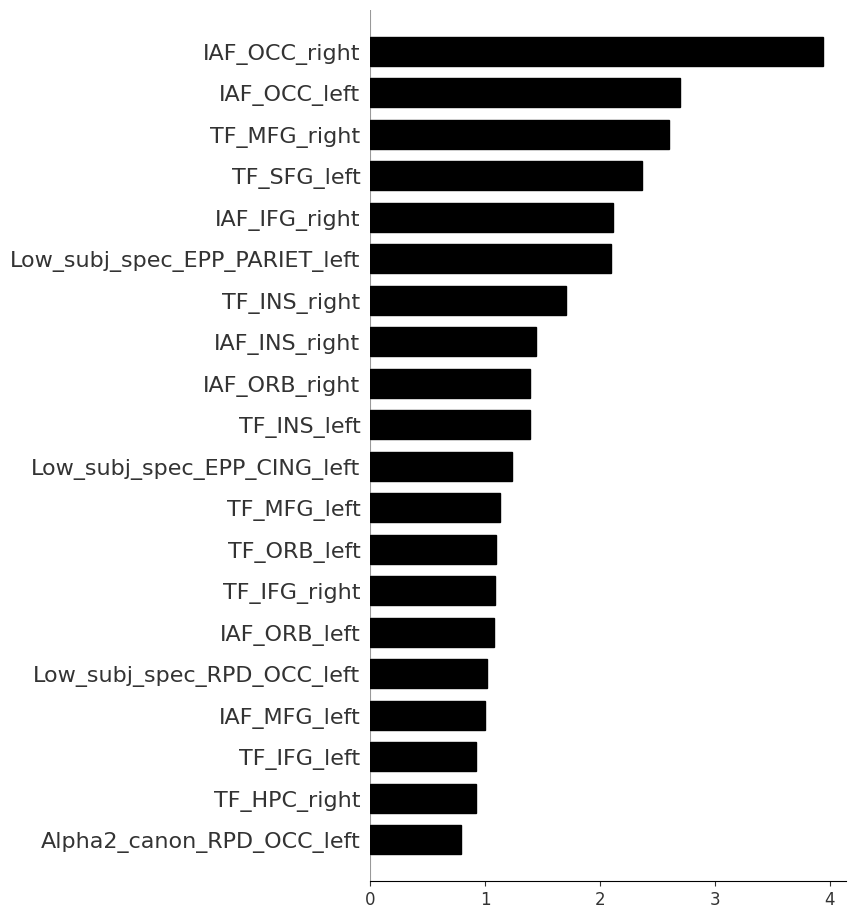

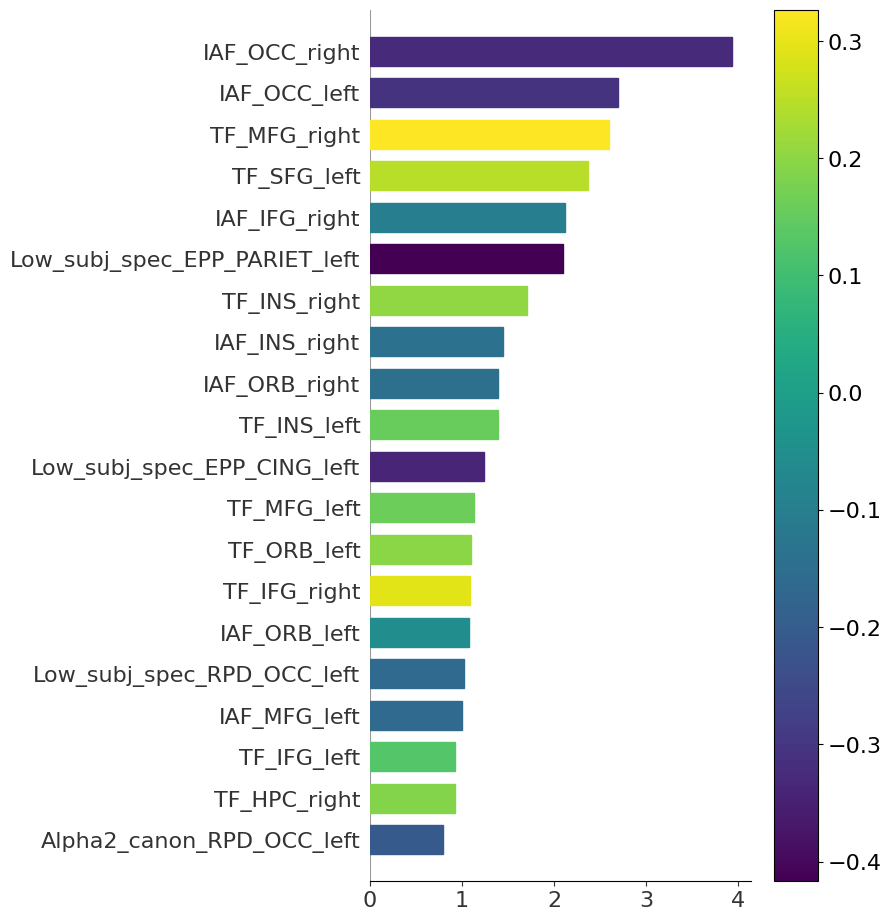

In [18]:
Plotter.plot_feature_importance(shap_values=shap_values_,X_test=svr_model.X_test,y_test=svr_model.y_test)

In [19]:
shap_por_region_sorted, resultado_normalizado_sorted=svr_model.shap_region(shap_summary_sorted=shap_sumary_sorted_, num_max=20)

OCC_left: 1.000000
OCC_right: 0.875797
IFG_right: 0.712261
INS_right: 0.700037
MFG_right: 0.578351
SFG_left: 0.525948
ORB_left: 0.483049
MFG_left: 0.473566
PARIET_left: 0.465762
ORB_right: 0.309036
INS_left: 0.308938
CING_left: 0.274842
IFG_left: 0.205088
HPC_right: 0.204491


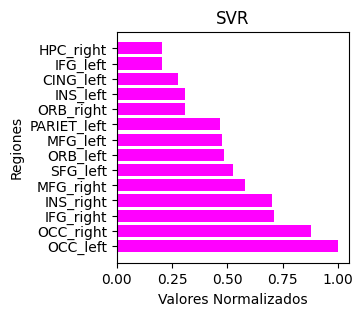

In [20]:
Plotter.plot_normalized_values(resultado_normalizado_sorted, color='magenta', name_set='SVR',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


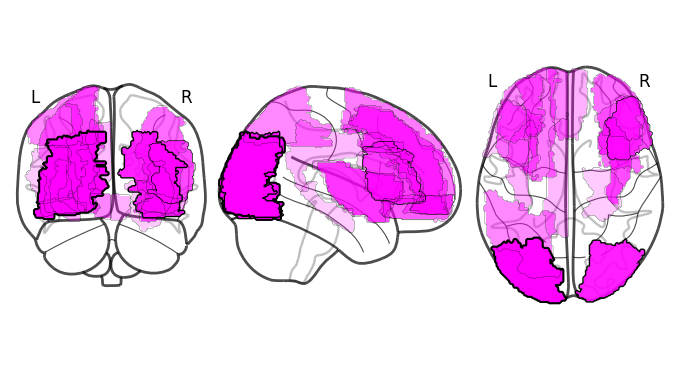

In [22]:
base_path = f'{path}cerebritos/'

Plotter.plot_brain_regions(resultado_normalizado_sorted, base_path, color='magenta')